# Clean data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Config: display 200 columns when printing dataset
pd.set_option("display.max_columns", 200)

# Importing to avoid warning when ploting data
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### 1) Reading features dataset

**1.1) Reading CSV file and transposing it to have features in columns and individual data in rows**

In [2]:
raw_input_df = pd.read_csv('../data/grendene-indicadores-financeiros-raw.csv').transpose()
raw_input_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
Unnamed: 0,LPA Lucro por Acao $,VPA Valor Patr por Acao$,Vendas por Acao $,EBITDA por Acao $,Divida Total Liquida $,Divida Total Bruta $,Divida Bruta / Atv Tt %,Divida Bruta / Pat Liq %,Divida Liq / Pat Liq %,Estr Cap (D/D+Pat Liq) %,EBIT / Divida Bruta %,EBIT / Divida Liquida %,EBIT / Desp Fin Brut x,EBIT / Desp Fin Liq x,Divida Bruta / Ebitda x,Divida liq / Ebitda x,Divida CP / Divida Tt %,Exigivel Tt / Ativo Tt %,Exigivel Tt / Pat Liq %,Exigivel Tt / Receita %,Ativo Fixo / Pat Liq %,Investimentos / Pat Lq %,Liquidez Geral x,Liquidez Corrente x,Liquidez Seca x,Capital de Giro $,Capital Employed $,Prazo Med Estoques(dias),Prazo Med Forneced(dias),Prazo Med Recebim (dias),Ciclo Financeiro (dias),Ciclo Operacional (dias),EBITDA $,LAIR + Desp Fin Liq $,Giro do Ativo x,Giro do Pat Liq x,Margem Bruta %,Margem EBIT (Operac) %,Margem Liquida %,Margem Ebitda %,ROA Rentab do Ativo %,ROE Rent Pat(pat final)%,ROE Rent Pat(pat medio)%,ROE Rent Pat (pat inic)%,ROIC (IC fim) %,ROIC (IC medio) %,ROIC (IC inicial) %,Invested Capital $,Rentab Invest Subsid %,Alavancagem Financ x,Alavancagem Operac x,Capex (incl invest) $,Depreciacao e amortiz $,Capex (inc inv)/Deprec %,Deprec / Imob e Intang %,Fluxo de caixa livre $
31/12/2003,0.648354,2.21104,1.83187,1.0847,6.8965e+07,1.32215e+08,14.4749,19.0862,10,16.0272,181.641,348.2,4.97259,33.8,0.389052,0.2,11.1697,24.1604,31.8572,38.4512,24.8498,7.29336,3.13003,6.66538,5.24888,5.84871e+08,8.24941e+08,178.464,31.1506,196.055,343.367,374.518,3.39839e+08,2.40156e+08,0.628338,0.828509,48.6024,41.8441,35.393,59.2126,22.2388,29.3234,NaN,NaN,25.4108,NaN,NaN,6.23761e+08,210.78,1.27406,2.14994,2.49281e+08,9.9683e+07,250.1,NaN,NaN
31/03/2004,NaN,2.25414,NaN,NaN,1.31742e+08,1.34186e+08,14.524,19.0004,18.7,15.9667,NaN,NaN,NaN,NaN,NaN,NaN,10.9117,23.5592,30.8202,NaN,24.0228,7.64555,3.2171,7.10268,5.98291,5.98777e+08,8.40414e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.74486e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1.2) Setting dataset columns names as the data's first row and removing that row**

In [3]:
raw_input_df.columns = raw_input_df.iloc[0]
raw_input_df = raw_input_df.iloc[1:,]

**1.3) Transforming index from type object to datetime**

In [4]:
raw_input_df['Trimestre'] = pd.to_datetime(raw_input_df.index.values)
raw_input_df = raw_input_df.set_index('Trimestre')

**1.4) Get columns from dataset, interate over each column and transform type object => float**

In [5]:
cols = raw_input_df.columns
for col in cols:
    raw_input_df[col] = raw_input_df[col].astype(float)

In [6]:
raw_input_df.head(3)

Unnamed: 0,LPA Lucro por Acao $,VPA Valor Patr por Acao$,Vendas por Acao $,EBITDA por Acao $,Divida Total Liquida $,Divida Total Bruta $,Divida Bruta / Atv Tt %,Divida Bruta / Pat Liq %,Divida Liq / Pat Liq %,Estr Cap (D/D+Pat Liq) %,EBIT / Divida Bruta %,EBIT / Divida Liquida %,EBIT / Desp Fin Brut x,EBIT / Desp Fin Liq x,Divida Bruta / Ebitda x,Divida liq / Ebitda x,Divida CP / Divida Tt %,Exigivel Tt / Ativo Tt %,Exigivel Tt / Pat Liq %,Exigivel Tt / Receita %,Ativo Fixo / Pat Liq %,Investimentos / Pat Lq %,Liquidez Geral x,Liquidez Corrente x,Liquidez Seca x,Capital de Giro $,Capital Employed $,Prazo Med Estoques(dias),Prazo Med Forneced(dias),Prazo Med Recebim (dias),Ciclo Financeiro (dias),Ciclo Operacional (dias),EBITDA $,LAIR + Desp Fin Liq $,Giro do Ativo x,Giro do Pat Liq x,Margem Bruta %,Margem EBIT (Operac) %,Margem Liquida %,Margem Ebitda %,ROA Rentab do Ativo %,ROE Rent Pat(pat final)%,ROE Rent Pat(pat medio)%,ROE Rent Pat (pat inic)%,ROIC (IC fim) %,ROIC (IC medio) %,ROIC (IC inicial) %,Invested Capital $,Rentab Invest Subsid %,Alavancagem Financ x,Alavancagem Operac x,Capex (incl invest) $,Depreciacao e amortiz $,Capex (inc inv)/Deprec %,Deprec / Imob e Intang %,Fluxo de caixa livre $
Trimestre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-12-31,0.648354,2.211044,1.831871,1.084699,68965000.0,132215000.0,14.474896,19.086190,10.0,16.027207,181.64051,348.2,4.972586,33.8,0.389052,0.2,11.169686,24.160371,31.857185,38.451205,24.849796,7.293360,3.130033,6.665378,5.248876,584871000.0,824941000.0,178.46352,31.150631,196.054571,343.367461,374.518091,339839000.0,240156000.0,0.628338,0.828509,48.602443,41.844127,35.392992,59.212622,22.238778,29.323427,NaN,NaN,25.410848,NaN,NaN,623761000.0,210.780043,1.274059,2.14994,249281000.0,99683000.0,250.1,NaN,NaN
2004-03-31,NaN,2.254140,NaN,NaN,131742000.0,134186000.0,14.524039,19.000379,18.7,15.966655,NaN,NaN,NaN,NaN,NaN,NaN,10.911720,23.559215,30.820217,NaN,24.022837,7.645548,3.217104,7.102684,5.982908,598777000.0,840414000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574486000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-06-30,NaN,2.312872,NaN,NaN,186723000.0,138671000.0,14.749818,19.136827,25.8,16.062898,NaN,NaN,NaN,NaN,NaN,NaN,11.041963,22.924436,29.742806,NaN,22.686506,8.012376,3.330013,7.752165,6.465193,622320000.0,863300000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537906000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
raw_input_df.describe()

Unnamed: 0,LPA Lucro por Acao $,VPA Valor Patr por Acao$,Vendas por Acao $,EBITDA por Acao $,Divida Total Liquida $,Divida Total Bruta $,Divida Bruta / Atv Tt %,Divida Bruta / Pat Liq %,Divida Liq / Pat Liq %,Estr Cap (D/D+Pat Liq) %,EBIT / Divida Bruta %,EBIT / Divida Liquida %,EBIT / Desp Fin Brut x,EBIT / Desp Fin Liq x,Divida Bruta / Ebitda x,Divida liq / Ebitda x,Divida CP / Divida Tt %,Exigivel Tt / Ativo Tt %,Exigivel Tt / Pat Liq %,Exigivel Tt / Receita %,Ativo Fixo / Pat Liq %,Investimentos / Pat Lq %,Liquidez Geral x,Liquidez Corrente x,Liquidez Seca x,Capital de Giro $,Capital Employed $,Prazo Med Estoques(dias),Prazo Med Forneced(dias),Prazo Med Recebim (dias),Ciclo Financeiro (dias),Ciclo Operacional (dias),EBITDA $,LAIR + Desp Fin Liq $,Giro do Ativo x,Giro do Pat Liq x,Margem Bruta %,Margem EBIT (Operac) %,Margem Liquida %,Margem Ebitda %,ROA Rentab do Ativo %,ROE Rent Pat(pat final)%,ROE Rent Pat(pat medio)%,ROE Rent Pat (pat inic)%,ROIC (IC fim) %,ROIC (IC medio) %,ROIC (IC inicial) %,Invested Capital $,Rentab Invest Subsid %,Alavancagem Financ x,Alavancagem Operac x,Capex (incl invest) $,Depreciacao e amortiz $,Capex (inc inv)/Deprec %,Deprec / Imob e Intang %,Fluxo de caixa livre $
count,60.000000,63.000000,60.000000,57.000000,6.300000e+01,6.300000e+01,63.000000,63.000000,63.000000,63.000000,60.000000,60.000000,60.000000,60.000000,57.000000,57.000000,63.000000,63.000000,63.000000,60.000000,63.000000,63.000000,63.000000,63.000000,63.000000,6.300000e+01,6.300000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,5.700000e+01,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,57.000000,60.000000,60.000000,59.000000,59.000000,60.000000,59.000000,59.000000,6.300000e+01,60.000000,60.000000,60.000000,5.700000e+01,5.700000e+01,57.000000,55.000000,5.500000e+01
mean,0.404634,2.103329,1.911675,0.395698,7.326126e+08,1.480370e+08,8.462613,10.781641,39.753968,9.309115,281.194013,49.285000,3.081937,8.393423,0.528671,2.377193,52.557393,16.986504,21.260463,21.033053,14.441739,3.096660,5.873514,6.962633,6.200246,1.422458e+09,1.983533e+09,69.297231,11.746972,112.315159,169.865419,181.612390,3.423068e+08,2.962499e+08,0.791684,0.960953,44.617913,17.503507,19.916786,20.153746,15.071726,17.842286,18.577183,19.622499,18.663898,19.247433,20.208922,1.102884e+09,40.171777,1.573132,2.586742,7.493940e+07,3.777016e+07,183.040285,14.306597,2.685564e+08
std,0.212619,0.890531,0.472436,0.159013,4.048140e+08,6.364493e+07,5.507321,7.786797,12.519557,6.127892,237.135340,44.595507,2.002296,12.569770,0.379823,0.910459,26.323893,6.656109,10.137414,7.751060,3.953772,1.652855,2.271546,1.656488,1.469610,5.515978e+08,8.270020e+08,18.842278,3.684058,23.386638,32.512176,35.014210,1.180695e+08,1.097538e+08,0.131326,0.207113,2.621355,4.266844,7.572888,5.920992,4.794691,5.072592,5.165593,5.510015,4.584368,4.844209,5.595217,5.469611e+08,50.145811,0.332224,0.398140,5.377514e+07,1.694714e+07,94.591414,1.212391,1.133395e+08
min,0.065061,0.821877,1.136898,0.167978,6.896500e+07,2.521900e+07,1.204284,1.343705,10.000000,1.325889,59.281074,17.800000,1.005855,1.217904,0.080045,0.200000,10.729159,7.600365,8.225536,10.513180,10.215064,1.239122,2.677690,4.339955,3.859137,5.848710e+08,8.249410e+08,48.486224,6.969357,70.349367,119.417460,129.766277,1.511800e+08,1.238770e+08,0.549327,0.623304,38.450072,11.114119,4.224922,14.506060,4.852889,6.302568,6.560066,6.839500,11.812623,12.072613,11.446675,4.638420e+08,0.500000,0.663055,2.068983,1.219500e+07,1.953500e+07,44.827087,11.967661,1.623500e+07
25%,0.150716,1.285697,1.527714,0.268602,4.363560e+08,1.082810e+08,3.547918,3.977272,32.300000,3.825117,106.799738,31.000000,1.434549,2.186978,0.245159,1.700000,29.138348,11.202062,12.615247,14.102271,11.758207,1.742483,3.753004,5.730377,5.181851,1.035352e+09,1.335246e+09,57.912925,9.496914,95.105021,151.822577,161.330035,2.343970e+08,1.862522e+08,0.710250,0.823764,42.577274,14.859700,12.385492,17.299815,9.805130,13.601634,14.349250,15.141446,15.077869,15.954172,16.6297

### First time visualizing data

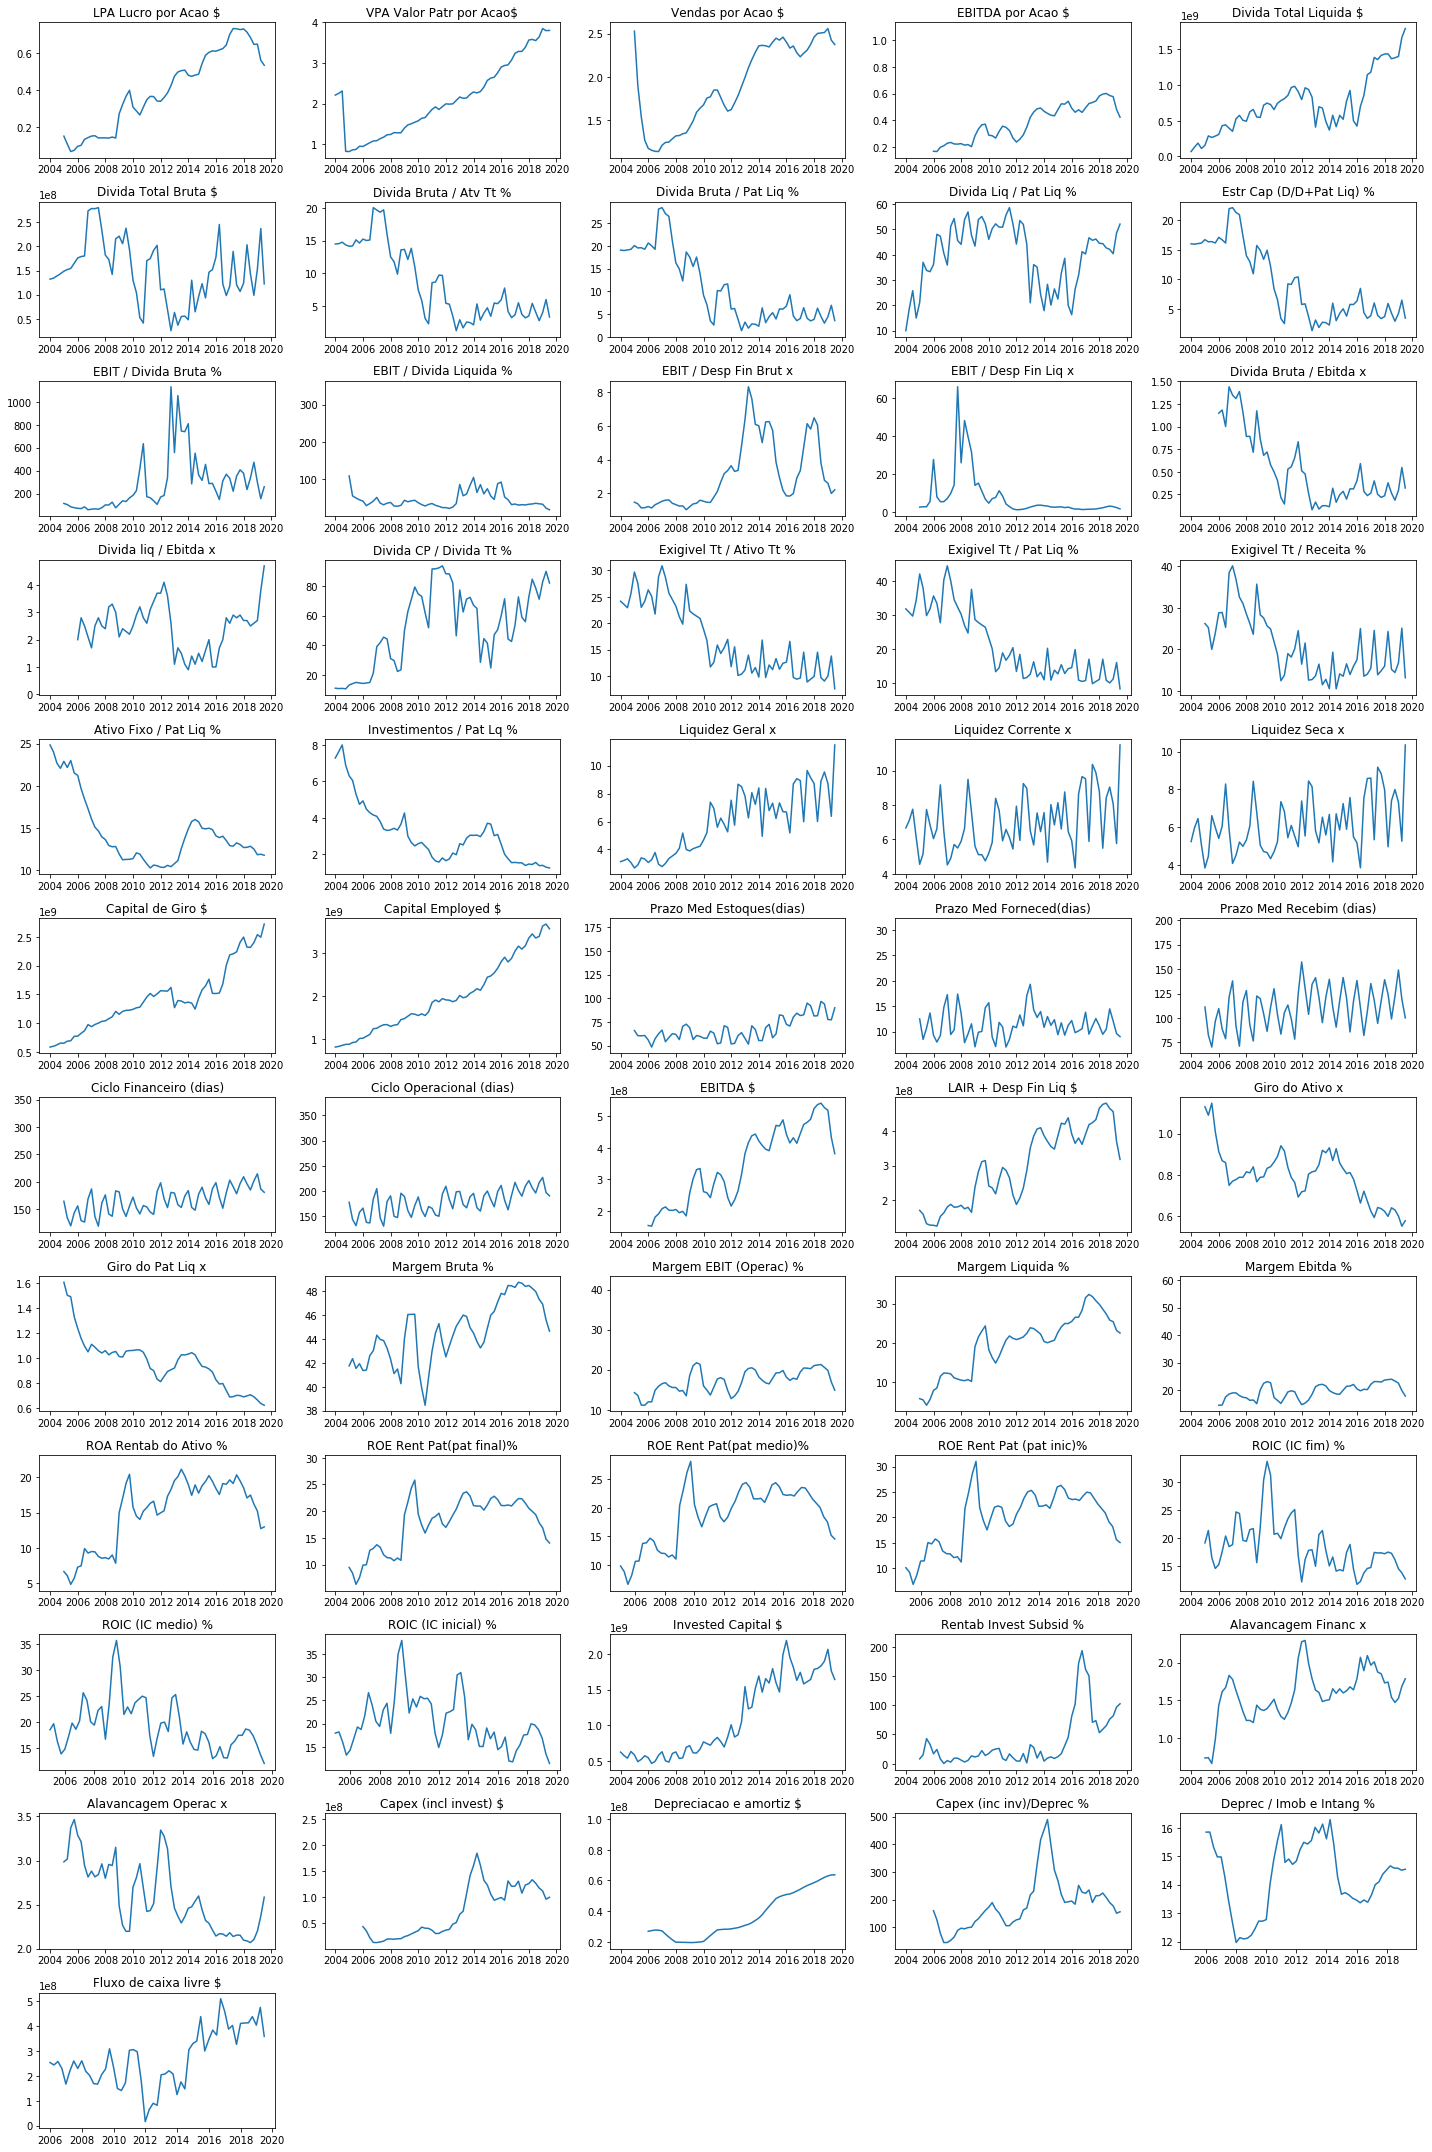

In [8]:
# Config: setting default plot size 
plt.rcParams["figure.figsize"] = (20,30)

for i in range(1, 57):
    a = plt.subplot(12, 5, i)
    a.set_title(raw_input_df.columns[i-1])
    plt.plot(raw_input_df.iloc[:,i-1])
plt.tight_layout()

### 2) Preparing The Data

#### 2.1) Dealing with missing data
It's possible to see that the data values seem to have a trend, but no seasonality. In this case, the missing data will be handles using Interpolation

In [9]:
raw_input_df.interpolate(method='linear', axis=0, inplace=True)

There are still some missing data. Ex: The column *"Fluxo de caixa livre $"* has the first 5 rows missing. The tecnique used to handle this last *NaN* is to drop those rows. Leaving the dataset with a total of 55 rows.

In [10]:
raw_input_df.dropna(inplace=True)

In [11]:
raw_input_df.describe()

Unnamed: 0,LPA Lucro por Acao $,VPA Valor Patr por Acao$,Vendas por Acao $,EBITDA por Acao $,Divida Total Liquida $,Divida Total Bruta $,Divida Bruta / Atv Tt %,Divida Bruta / Pat Liq %,Divida Liq / Pat Liq %,Estr Cap (D/D+Pat Liq) %,EBIT / Divida Bruta %,EBIT / Divida Liquida %,EBIT / Desp Fin Brut x,EBIT / Desp Fin Liq x,Divida Bruta / Ebitda x,Divida liq / Ebitda x,Divida CP / Divida Tt %,Exigivel Tt / Ativo Tt %,Exigivel Tt / Pat Liq %,Exigivel Tt / Receita %,Ativo Fixo / Pat Liq %,Investimentos / Pat Lq %,Liquidez Geral x,Liquidez Corrente x,Liquidez Seca x,Capital de Giro $,Capital Employed $,Prazo Med Estoques(dias),Prazo Med Forneced(dias),Prazo Med Recebim (dias),Ciclo Financeiro (dias),Ciclo Operacional (dias),EBITDA $,LAIR + Desp Fin Liq $,Giro do Ativo x,Giro do Pat Liq x,Margem Bruta %,Margem EBIT (Operac) %,Margem Liquida %,Margem Ebitda %,ROA Rentab do Ativo %,ROE Rent Pat(pat final)%,ROE Rent Pat(pat medio)%,ROE Rent Pat (pat inic)%,ROIC (IC fim) %,ROIC (IC medio) %,ROIC (IC inicial) %,Invested Capital $,Rentab Invest Subsid %,Alavancagem Financ x,Alavancagem Operac x,Capex (incl invest) $,Depreciacao e amortiz $,Capex (inc inv)/Deprec %,Deprec / Imob e Intang %,Fluxo de caixa livre $
count,55.000000,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,55.000000,55.000000,5.500000e+01
mean,0.422502,2.207155,1.920597,0.382768,8.120089e+08,1.483202e+08,7.582139,9.530619,41.996364,8.301728,296.544423,42.750909,3.179685,8.291007,0.527072,2.445455,58.363065,15.809551,19.466193,20.510411,13.211276,2.596819,6.272898,7.031472,6.307432,1.533667e+09,2.141186e+09,67.852748,11.424510,112.399486,168.827725,180.252235,3.450017e+08,3.081595e+08,0.772610,0.925333,44.744089,17.422844,20.695234,19.509570,15.613311,18.354207,19.323947,20.414941,18.593271,19.402647,20.488023,1.180857e+09,38.178665,1.636295,2.549384,7.264347e+07,3.684222e+07,183.332193,14.286953,2.685564e+08
std,0.202291,0.869778,0.475797,0.131343,3.696917e+08,6.807302e+07,5.347223,7.552951,11.281400,5.913216,241.727769,20.207982,2.014545,12.599190,0.385079,0.849143,22.908597,6.245707,9.467969,7.664019,2.377265,0.981592,2.153406,1.714528,1.504817,4.996697e+08,7.650995e+08,12.672321,2.730025,20.352565,22.675326,23.702268,1.185572e+08,1.061766e+08,0.104697,0.155804,2.576497,2.632805,6.468661,2.727319,4.184918,4.246470,4.492204,4.802978,4.646469,4.947701,5.671187,5.425970e+08,46.616125,0.259136,0.369027,4.886559e+07,1.495961e+07,95.224127,1.199345,1.133395e+08
min,0.093772,0.947297,1.136898,0.167978,3.079760e+08,2.521900e+07,1.204284,1.343705,16.300000,1.325889,59.281074,17.800000,1.005855,1.217904,0.080045,0.900000,14.353035,7.600365,8.225536,10.513180,10.215064,1.239122,2.773394,4.339955,3.866314,7.743620e+08,1.028697e+09,48.486224,6.969357,71.214078,119.417460,129.766277,1.511800e+08,1.238770e+08,0.549327,0.623304,38.450072,11.957355,7.988978,14.506060,7.294693,9.898929,10.600682,11.234531,11.812623,12.072613,11.446675,4.638420e+08,0.500000,1.205590,2.068983,1.219500e+07,1.953500e+07,44.827087,11.967661,1.623500e+07
25%,0.278425,1.491748,1.541123,0.264210,5.233115e+08,1.013870e+08,3.430279,3.842131,36.000000,3.699973,128.279669,30.500000,1.481554,1.981422,0.240809,1.850000,43.410867,10.469318,11.693675,14.002840,11.287728,1.632718,4.190882,5.730377,5.202967,1.213430e+09,1.544248e+09,57.721718,9.488763,97.165855,152.867776,163.287181,2.381425e+08,2.100680e+08,0.703847,0.804983,43.117348,15.551151,16.458603,17.345325,13.503998,15.335327,15.940418,16.655773,15.062097,15.954172,16.733

In [12]:
raw_input_df.tail(2)

Unnamed: 0,LPA Lucro por Acao $,VPA Valor Patr por Acao$,Vendas por Acao $,EBITDA por Acao $,Divida Total Liquida $,Divida Total Bruta $,Divida Bruta / Atv Tt %,Divida Bruta / Pat Liq %,Divida Liq / Pat Liq %,Estr Cap (D/D+Pat Liq) %,EBIT / Divida Bruta %,EBIT / Divida Liquida %,EBIT / Desp Fin Brut x,EBIT / Desp Fin Liq x,Divida Bruta / Ebitda x,Divida liq / Ebitda x,Divida CP / Divida Tt %,Exigivel Tt / Ativo Tt %,Exigivel Tt / Pat Liq %,Exigivel Tt / Receita %,Ativo Fixo / Pat Liq %,Investimentos / Pat Lq %,Liquidez Geral x,Liquidez Corrente x,Liquidez Seca x,Capital de Giro $,Capital Employed $,Prazo Med Estoques(dias),Prazo Med Forneced(dias),Prazo Med Recebim (dias),Ciclo Financeiro (dias),Ciclo Operacional (dias),EBITDA $,LAIR + Desp Fin Liq $,Giro do Ativo x,Giro do Pat Liq x,Margem Bruta %,Margem EBIT (Operac) %,Margem Liquida %,Margem Ebitda %,ROA Rentab do Ativo %,ROE Rent Pat(pat final)%,ROE Rent Pat(pat medio)%,ROE Rent Pat (pat inic)%,ROIC (IC fim) %,ROIC (IC medio) %,ROIC (IC inicial) %,Invested Capital $,Rentab Invest Subsid %,Alavancagem Financ x,Alavancagem Operac x,Capex (incl invest) $,Depreciacao e amortiz $,Capex (inc inv)/Deprec %,Deprec / Imob e Intang %,Fluxo de caixa livre $
Trimestre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-31,0.561752,3.797400,2.424068,0.481104,1.664494e+09,237399000.0,5.972700,6.929614,48.6,6.480537,155.757606,22.2,1.978443,2.343873,0.547829,3.8,89.714363,13.809046,16.021457,25.138097,11.849222,1.281867,6.368936,5.756302,5.269755,2.492364e+09,3.663703e+09,77.243182,9.605219,119.311084,186.949047,196.554266,433345000.0,369767000.0,0.549327,0.637338,45.578587,16.935136,23.173940,19.846975,12.730081,14.769626,15.199319,15.654763,13.852017,13.713224,13.577184,1.761810e+09,97.0,1.685831,2.368663,95834000.0,63578000.0,150.734531,14.542818,475849000.0
2019-06-30,0.534796,3.802891,2.374106,0.423603,1.788544e+09,122432000.0,3.297371,3.568597,52.1,3.445636,259.633102,17.8,2.194429,1.674934,0.320877,4.7,81.881371,7.600365,8.225536,13.196670,11.726802,1.239122,11.478209,11.486422,10.347103,2.721520e+09,3.553740e+09,89.931719,9.017656,100.170975,181.085038,190.102694,381554000.0,317874000.0,0.575931,0.623304,44.649490,14.864754,22.526224,17.842625,12.973540,14.040683,14.533306,15.061754,12.770966,12.072613,11.446675,1.642764e+09,102.5,1.785834,2.584264,99405000.0,63680000.0,156.100817,14.542818,359358000.0


### Visualizing data without missing data (NaN)

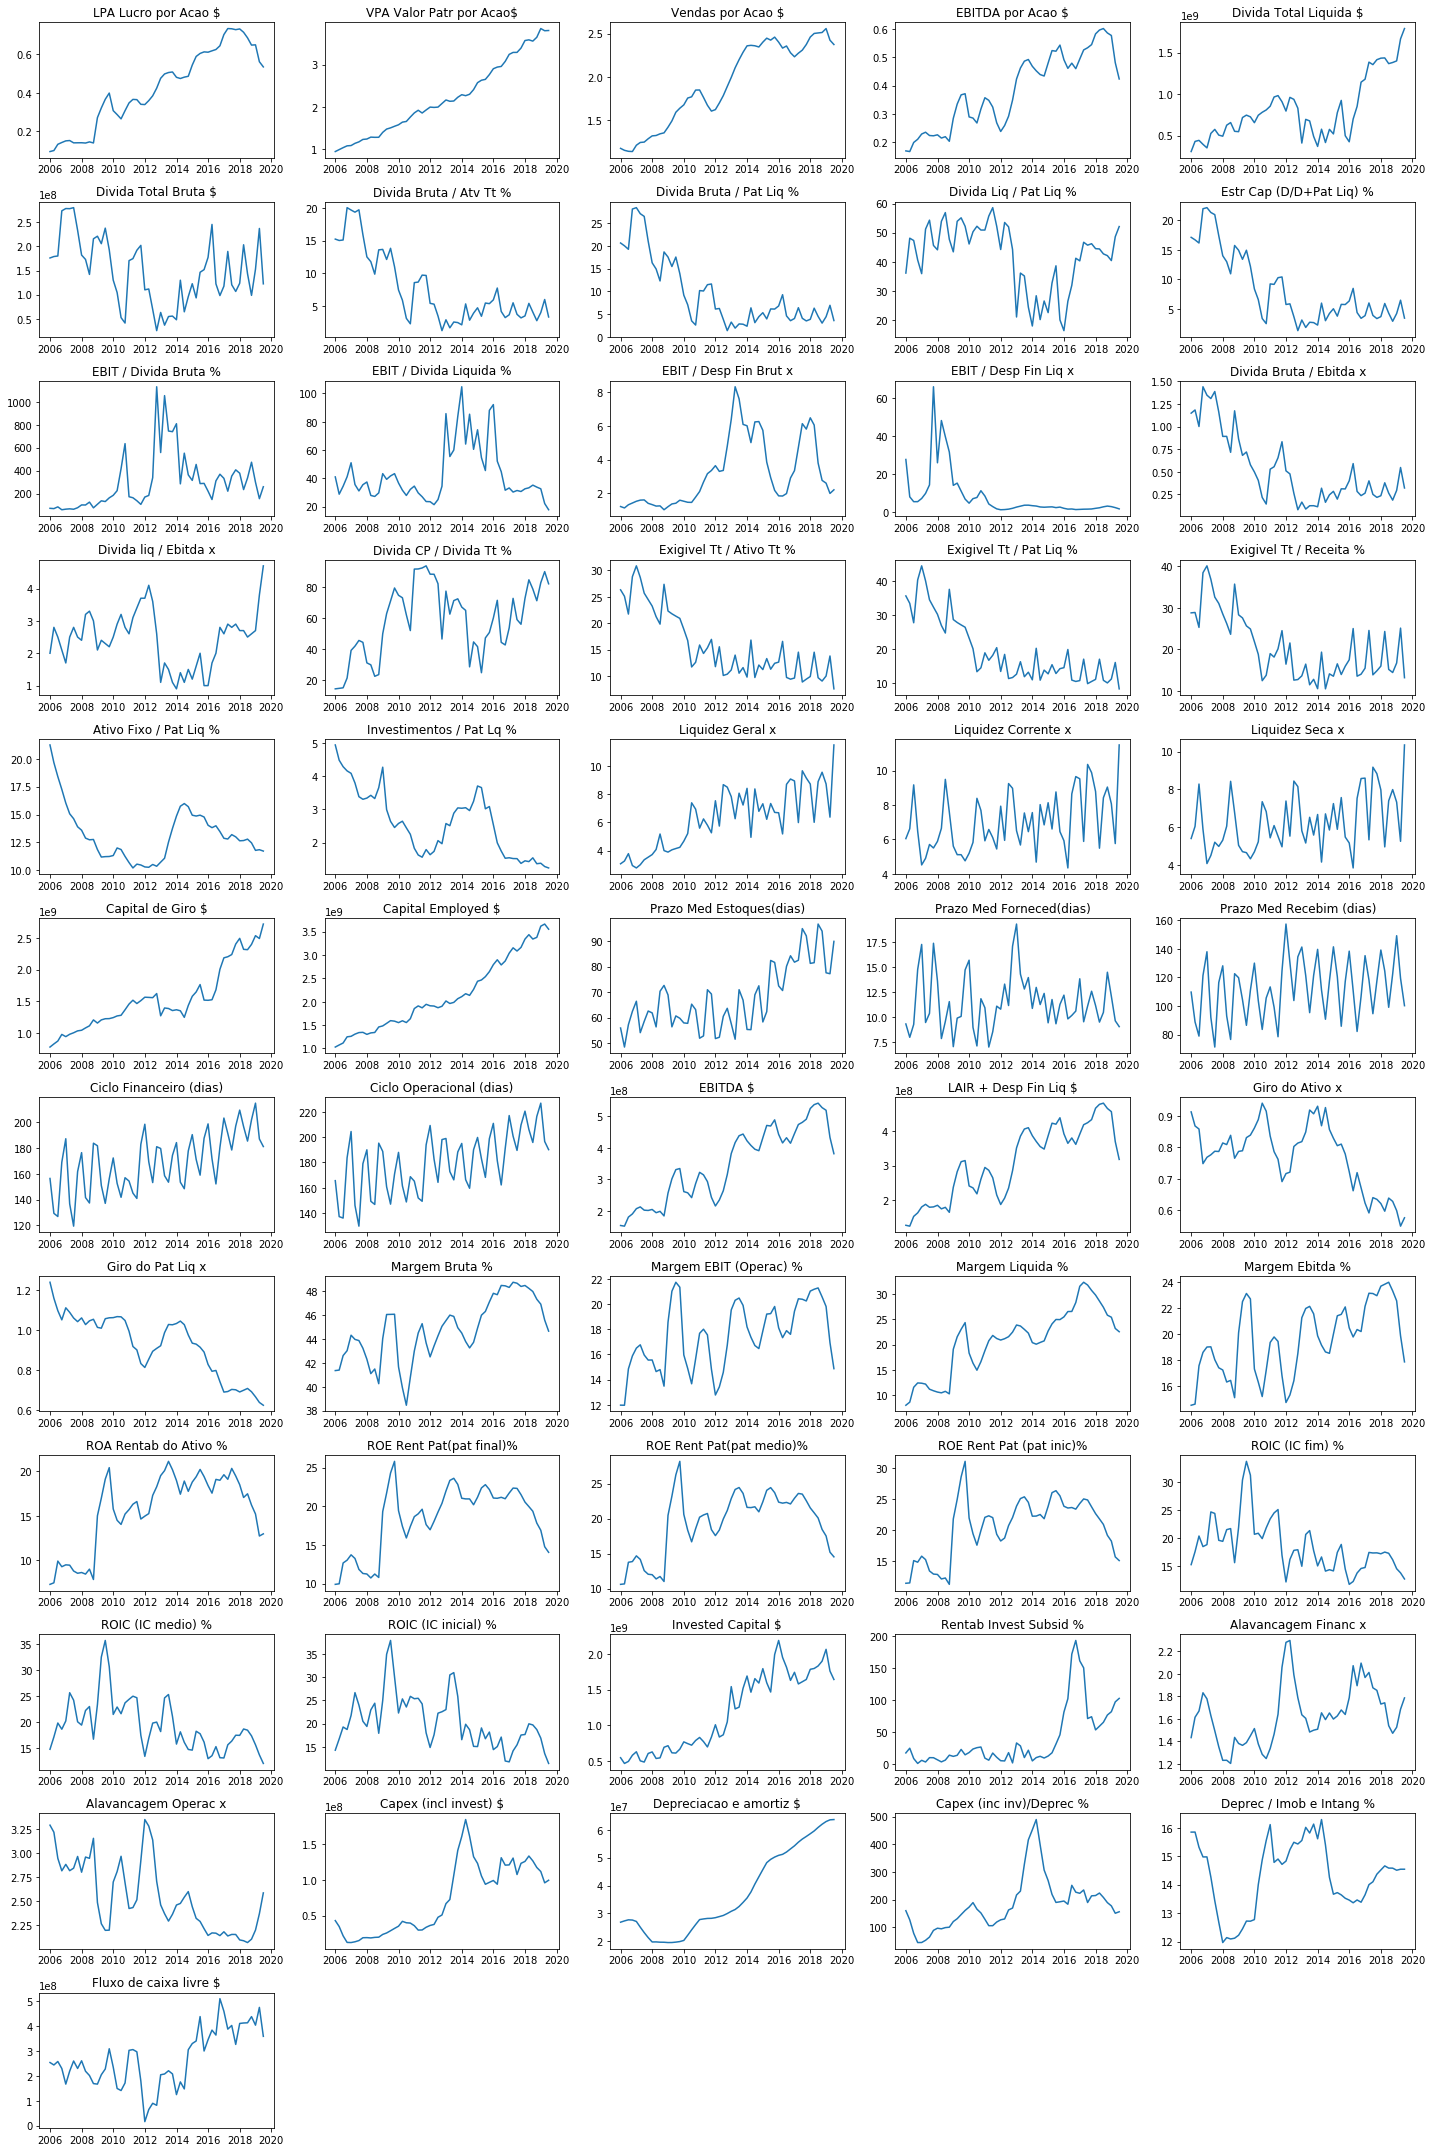

In [13]:
for i in range(1, 57):
    a = plt.subplot(12, 5, i)
    a.set_title(raw_input_df.columns[i-1])
    plt.plot(raw_input_df.iloc[:,i-1])
plt.tight_layout()

### Visualizing data, searching for outliers

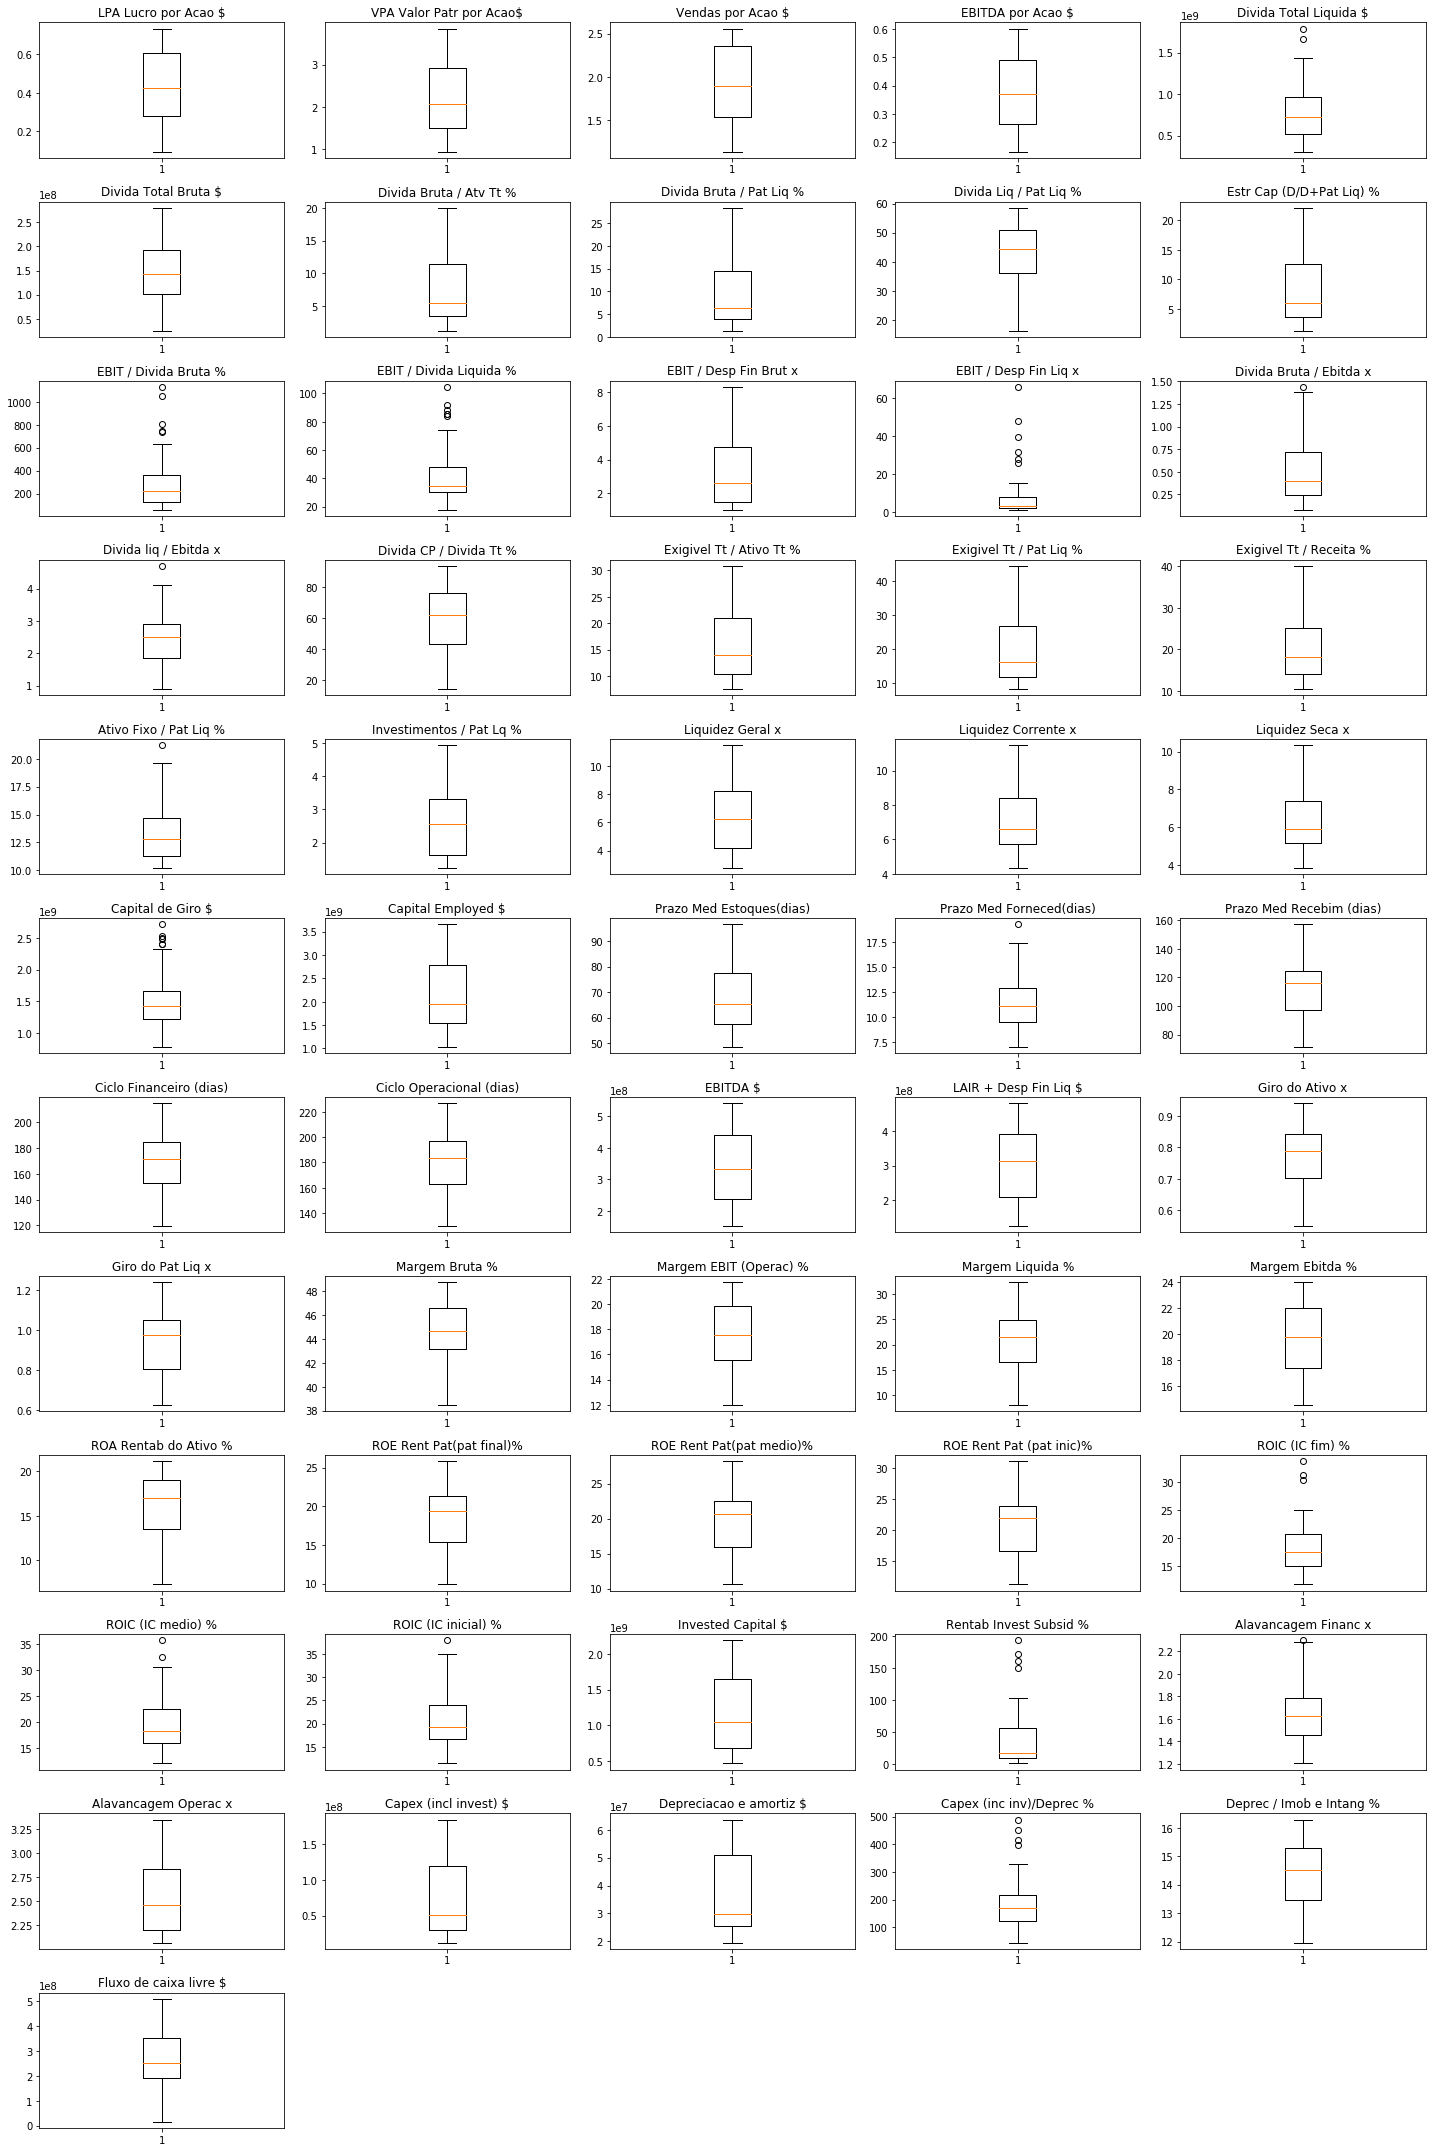

In [14]:
for i in range(1, 57):
    a = plt.subplot(12, 5, i)
    a.set_title(raw_input_df.columns[i-1])
    plt.boxplot(raw_input_df.iloc[:,i-1])
plt.tight_layout()

In [15]:
print("Grendene dataset has {} data points with {} variables each.".format(*raw_input_df.shape))

Grendene dataset has 55 data points with 56 variables each.


**Save final results to CSV file**

In [16]:
raw_input_df.to_csv(r'../data/grendene-indicadores-financeiros.csv', index=True)

Check if file was saved correctly

In [17]:
check_df = pd.read_csv('../data/grendene-indicadores-financeiros.csv', index_col=0)
check_df.head()

,LPA Lucro por Acao $,VPA Valor Patr por Acao$,Vendas por Acao $,EBITDA por Acao $,Divida Total Liquida $,Divida Total Bruta $,Divida Bruta / Atv Tt %,Divida Bruta / Pat Liq %,Divida Liq / Pat Liq %,Estr Cap (D/D+Pat Liq) %,EBIT / Divida Bruta %,EBIT / Divida Liquida %,EBIT / Desp Fin Brut x,EBIT / Desp Fin Liq x,Divida Bruta / Ebitda x,Divida liq / Ebitda x,Divida CP / Divida Tt %,Exigivel Tt / Ativo Tt %,Exigivel Tt / Pat Liq %,Exigivel Tt / Receita %,Ativo Fixo / Pat Liq %,Investimentos / Pat Lq %,Liquidez Geral x,Liquidez Corrente x,Liquidez Seca x,Capital de Giro $,Capital Employed $,Prazo Med Estoques(dias),Prazo Med Forneced(dias),Prazo Med Recebim (dias),Ciclo Financeiro (dias),Ciclo Operacional (dias),EBITDA $,LAIR + Desp Fin Liq $,Giro do Ativo x,Giro do Pat Liq x,Margem Bruta %,Margem EBIT (Operac) %,Margem Liquida %,Margem Ebitda %,ROA Rentab do Ativo %,ROE Rent Pat(pat final)%,ROE Rent Pat(pat medio)%,ROE Rent Pat (pat inic)%,ROIC (IC fim) %,ROIC (IC medio) %,ROIC (IC inicial) %,Invested Capital $,Rentab Invest Subsid %,Alavancagem Financ x,Alavancagem Operac x,Capex (incl invest) $,Depreciacao e amortiz $,Capex (inc inv)/Deprec %,Deprec / Imob e Intang %,Fluxo de caixa livre $
Trimestre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-12-31,0.093772,0.947297,1.173770,0.170268,307976000.0,176130000.0,15.223819,20.658787,36.1,17.121660,71.764606,41.0,1.197573,27.743415,1.149366,2.0,14.353035,26.308261,35.700420,28.812194,21.232349,4.934158,3.068141,6.044046,5.416786,774362000.0,1.028697e+09,55.953193,9.285730,109.692700,156.360163,165.645893,153241000.0,126399000.0,0.913095,1.239073,41.350425,11.965149,7.988978,14.506060,7.294693,9.898929,10.600682,11.409525,15.318531,14.788252,14.293458,544591000.0,17.0,1.434441,3.287077,42941000.0,26842000.0,159.976902,15.845617,254085000.0
2006-03-31,0.099011,0.993100,1.151100,0.167978,429948000.0,179115000.0,15.011012,20.039942,48.1,16.694395,69.160595,28.8,1.112691,8.027281,1.184780,2.8,14.675488,25.094534,33.501606,28.903175,19.647904,4.475884,3.264853,6.616855,6.059050,823459000.0,1.072905e+09,48.486224,7.947337,88.797846,129.336733,137.284069,151180000.0,123877000.0,0.868228,1.159098,41.391616,11.957355,8.601434,14.592805,7.468003,9.969903,10.665227,11.464809,17.626437,17.154743,16.707637,463842000.0,24.4,1.614638,3.214032,34624000.0,27303000.0,126.813903,15.847762,244201000.0
2006-06-30,0.131567,1.039060,1.139701,0.199952,442764000.0,180243000.0,15.085810,19.274152,47.3,16.159538,84.477622,34.4,1.302891,5.475976,1.001589,2.5,15.018614,21.730353,27.763449,25.311802,18.396970,4.281541,3.785010,9.166817,8.287146,869423000.0,1.115397e+09,57.264708,9.238985,78.874715,126.900438,136.139423,179957000.0,152265000.0,0.858507,1.096858,42.604153,14.844535,11.543962,17.544268,9.910570,12.662086,13.756480,15.057950,20.409614,19.826407,19.275603,492390000.0,8.2,1.669735,2.943125,21636000.0,27692000.0,78.130868,15.313407,258184000.0
2006-09-30,0.140957,1.081906,1.136898,0.211174,395001000.0,274020000.0,20.039608,28.141705,40.6,21.961394,59.281074,41.1,1.406972,5.491616,1.441778,2.1,21.302095,28.790354,40.430413,38.474777,17.255152,4.154604,2.943840,6.472974,5.904667,974348000.0,1.247735e+09,62.465486,14.751548,121.256988,168.970926,183.722473,190057000.0,162442000.0,0.748292,1.050829,43.013542,15.875755,12.398359,18.574620,9.277588,13.028556,13.858547,14.801484,18.525856,18.635016,18.745471,578714000.0,0.5,1.831308,2.813460,12379000.0,27615000.0,44.827087,14.975109,230033000.0
2006-12-31,0.149379,1.088760,1.209850,0.229708,352009000.0,278752000.0,19.674246,28.447449,35.9,22.147150,64.440435,51.0,1.511571,7.162812,1.348341,1.7,39.069495,30.840033,44.592319,40.129217,16.029755,4.081197,2.773394,4.516357,4.097283,939247000.0,1.258636e+09,66.455382,17.266597,137.950324,187.139110,204.405707,206737000.0,179629000.0,0.768518,1.111218,44.310176,16.496903,12.346893,18.986468,9.488812,13.720093,14.673353,15.768966,18.881965,20.223212,21.769574,627875000.0,5.4,1.777487,2.880225,1219500

**File is correct!**